Matplotlib Box Plots


Load data.


In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Notes

General

- `boxplot()`: plot a box plot
- Common Parameters:
  - `column` - column(s) to plot
  - `by` - if specified, data will be grouped and a box plot for each group will be plotted
  - `vert` - if False, plots horizontal boxplots
- - Syntax: `boxplot(column=['column1', 'column2', ...], by=None, vert=False)`

General Info

- Purpose:
  - Visualize the distribution of a dataset by displaying the summary statistics (minimum, first quartile, median, third quartile, and maximum).
  - Identify outliers and skewness in the data.
  - Compare distributions across multiple groups.

![Boxplot](https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png)
_Source: https://www.kdnuggets.com/2019/11/understanding-boxplots.html_

- Description: A box plot consists of a box representing the interquartile range (IQR), a line inside the box representing the median, and whiskers extending from the box to the minimum and maximum values within 1.5 times the IQR. Outliers beyond this range are plotted as individual points.
- Interpretation:
  - Box height represents the IQR (middle 50% of data).
  - Median line divides the box into the 25th and 75th percentiles.
  - Whiskers show the range of non-outlier data points.
  - Outliers are plotted as individual points beyond the whiskers.

Advantages

- Compact visualization of key summary statistics.
- Easy to compare distributions across multiple groups.
- Identifies skewness and outliers in the data.


Example 1

Create a box plot to see the distribution of `salary_year_avg` for the DataFrame.


In [8]:
# Only get data analyst jobs
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

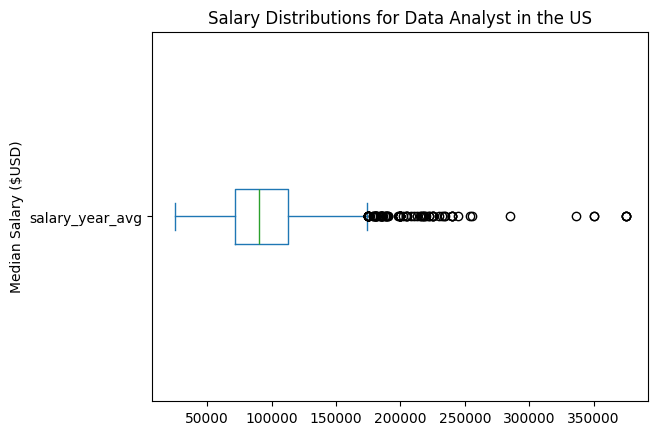

In [9]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)
# Alternatively, you can use matplotlib
# plt.boxplot(df_DA_US['salary_year_avg'])

plt.title('Salary Distributions for Data Analyst in the US')
plt.ylabel('Median Salary ($USD)')
plt.show()

Interpretation

- Median Salary: The green line in the box indicates the median salary, which appears to be around $100,000.
- Interquartile Range (IQR): The box itself spans from approximately $65,000 (lower quartile) to $125,000 (upper quartile). This range represents the middle 50% of the salary data.
- Whiskers: The lines extending from the box (whiskers) suggest the range of typical salaries beyond the IQR. The lower whisker extends to about $50,000, indicating the minimum typical salary. The upper whisker goes up to about $175,000, suggesting the maximum typical salary before considering outliers.
- Outliers: Salaries represented by dots above the upper whisker are considered outliers. There are several outliers ranging up to approximately $350,000, indicating salaries that are unusually high compared to the general distribution.


In [ ]:
# plot histogram and boxplot for df_DA_US['salary_year_avg'] on same figure

fig, ax = plt.subplots(2, 1)
fig.tight_layout(h_pad=1)

df_DA_US['salary_year_avg'].plot(kind='hist', ax=ax[0], bins=30, edgecolor='white')
ax[0].set_title('Salary Distributions for Data Analyst in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('Frequency')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, val: '${0:g}k'.format(x/1000)))

# Add vertical lines
ax[0].axvlines(df_DA_US['salary_year_avg'].median(), color='r', linestyle='--')
ax[0].axvlines(df_DA_US['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[0].axvlines(df_DA_US['salary_year_avg'].quantile(0.75), color='y', linestyle='--')
ax[0].legend(['', 'Median', 'Q1 & Q3'])


